In [1]:
#imporing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
#loading Datasets
df = pd.read_csv('ML case Study.csv')
college = pd.read_csv('Colleges.csv')
cities = pd.read_csv('cities.csv')

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [5]:
#checking null values or missing values
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

In [6]:
# replace categorical data to numerical Tier1:1 and Tier2:2 after matching with college dataset
df['College Type'] = df['College'].apply(
    lambda x: 1 if x in college['Tier 1'].values else
              2 if x in college['Tier 2'].values else
              3)
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,1


In [7]:
#Replacing City type 1 and 0 after matching with cities dataset
df['City Type'] = df['City'].apply(
    lambda x: 1 if x in cities['Metrio City'].values else
              0 if x in cities['non-metro cities'].values else 0 )
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,2,0
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,2,0
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,3,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,3,0
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,1,0


In [8]:
#droping irrelevent columns
df = df.drop(['College', 'City'], axis=1)
df.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Type
0,Manager,55523.0,3,66,19,71406.58,2,0
1,Executive,57081.0,1,84,18,68005.87,2,0
2,Executive,60347.0,2,52,28,76764.02,3,0
3,Executive,49010.0,2,81,33,82092.39,3,0
4,Executive,57879.0,4,74,32,73878.10,1,0


In [9]:
#using one hot ending (dummies) to handle categoricals data
dummies = pd.get_dummies(df,drop_first=True,dtype=int)
dummies.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Type,Role_Manager
0,55523.0,3,66,19,71406.58,2,0,1
1,57081.0,1,84,18,68005.87,2,0,0
2,60347.0,2,52,28,76764.02,3,0,0
3,49010.0,2,81,33,82092.39,3,0,0
4,57879.0,4,74,32,73878.10,1,0,0


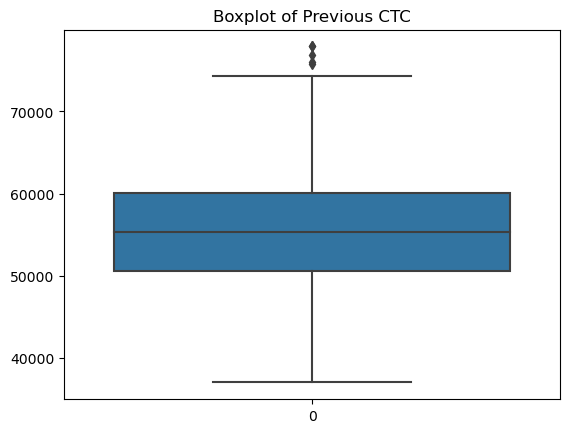

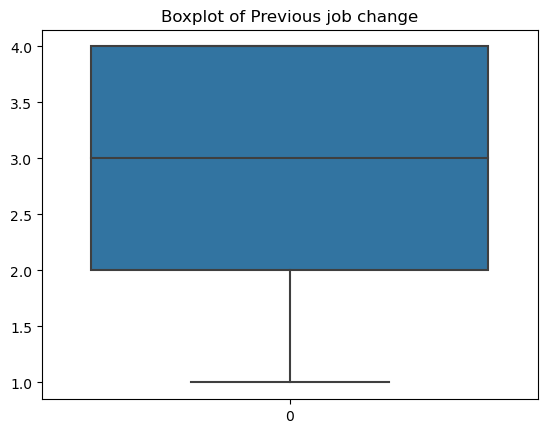

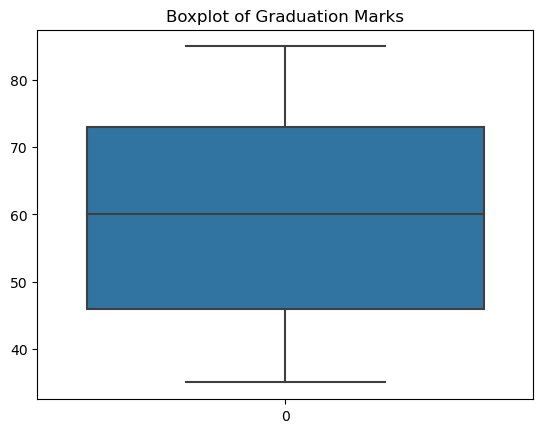

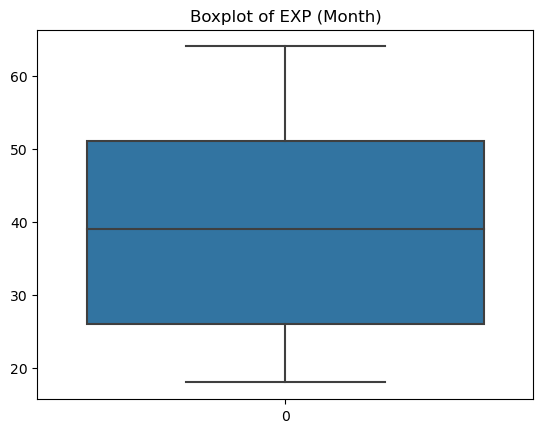

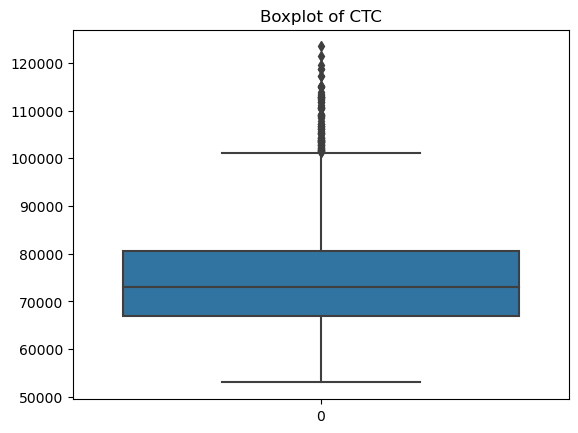

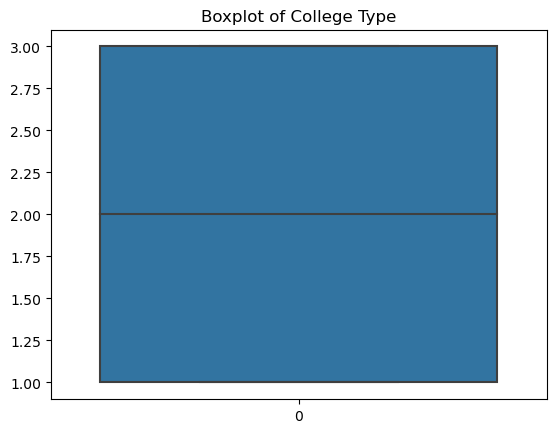

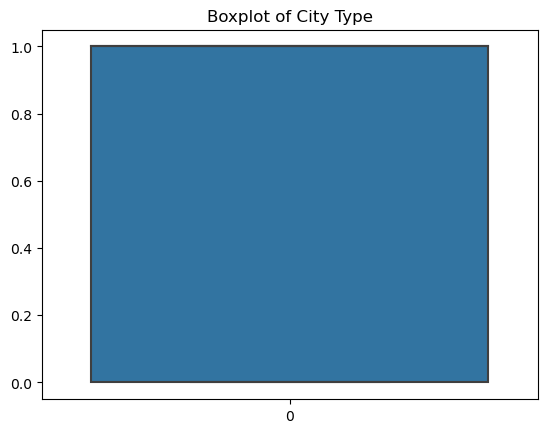

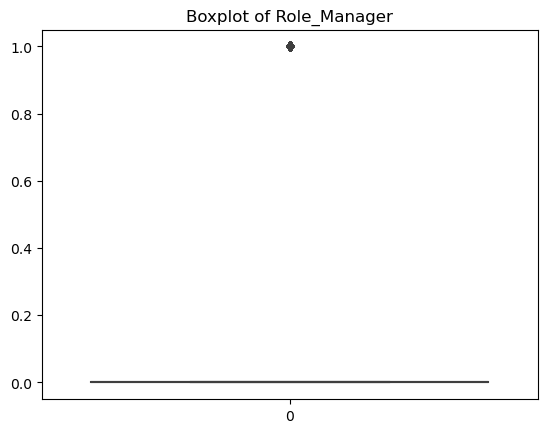

In [10]:
#created function to plot boxplot to check outliers
def plot_boxplots(df):
  for col in df.columns:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


plot_boxplots(dummies)


In [11]:
dummies.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Type,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,1.975456,0.514160,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.838330,0.499957,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,1.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,2.000000,1.000000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,3.000000,1.000000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,3.000000,1.000000,1.000000


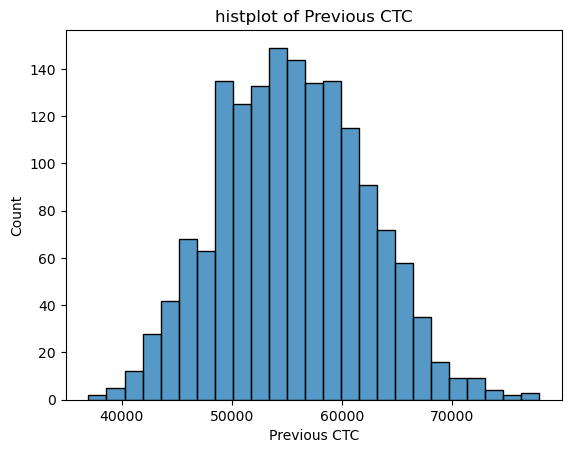

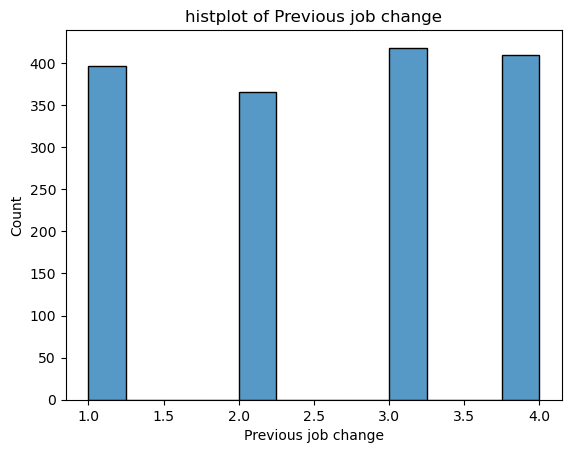

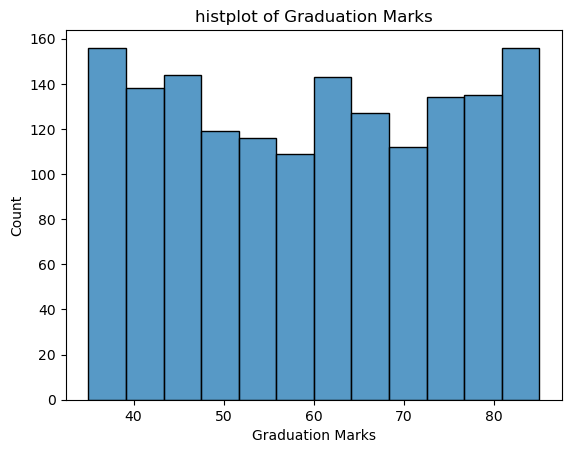

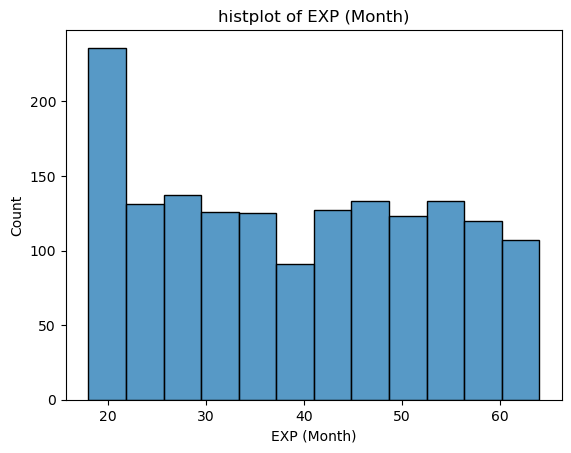

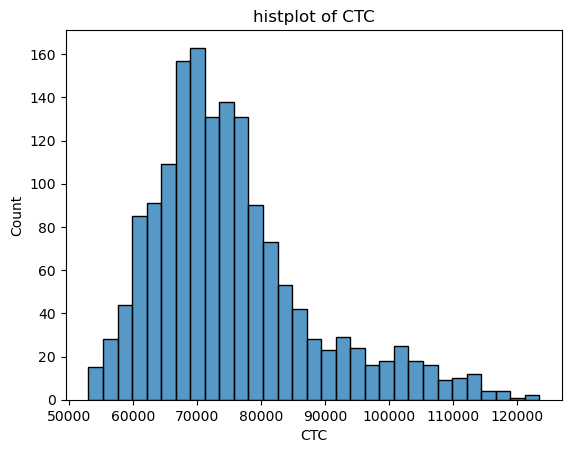

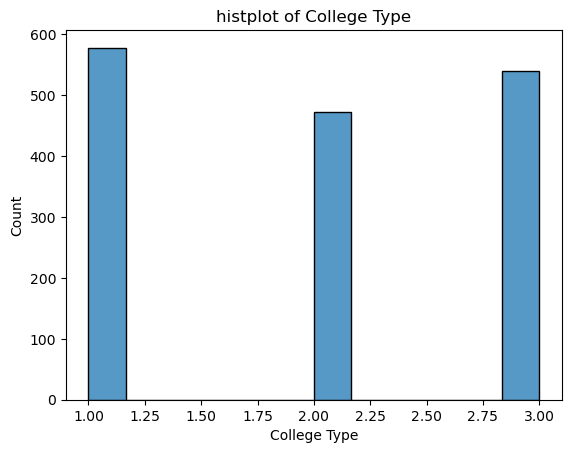

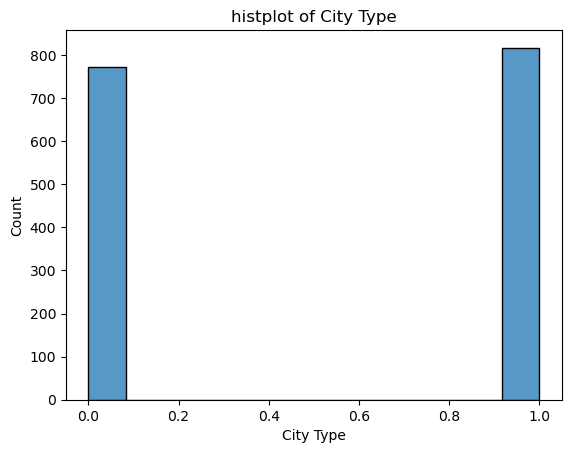

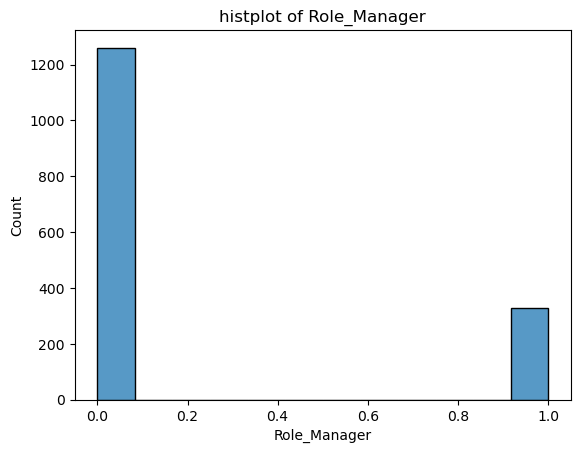

In [12]:
#created function to plot histogram to check data destribution
def plot_histplot(df):
  for col in df.columns:
    sns.histplot(df[col])
    plt.title(f"histplot of {col}")
    plt.show()


plot_histplot(dummies)

In [13]:
def treat_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
  return df

outlier_columns = ['Previous CTC', 'CTC']
new_df = treat_outliers(dummies.copy(), outlier_columns)

<Axes: >

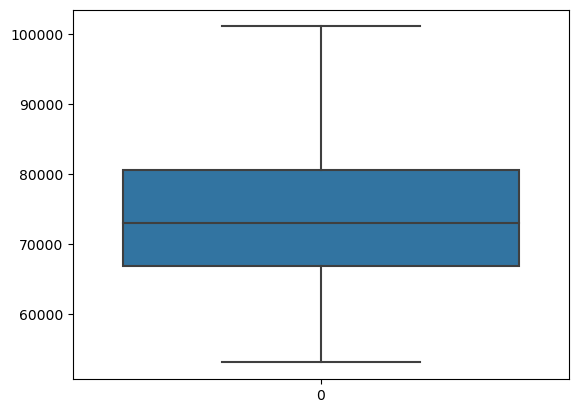

In [14]:
sns.boxplot(new_df['CTC'])

In [15]:
new_df.shape

(1589, 8)

In [16]:
new_df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College Type,City Type,Role_Manager
count,1589.00000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55510.89270,2.528634,59.855255,39.044682,74949.456306,1.975456,0.514160,0.206419
std,6632.04596,1.123918,14.935139,14.108875,11536.548461,0.838330,0.499957,0.404862
min,36990.00000,1.000000,35.000000,18.000000,53020.320000,1.000000,0.000000,0.000000
25%,50518.00000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000,0.000000
50%,55291.00000,3.000000,60.000000,39.000000,73028.670000,2.000000,1.000000,0.000000
75%,60109.00000,4.000000,73.000000,51.000000,80588.670000,3.000000,1.000000,0.000000
max,74495.50000,4.000000,85.000000,64.000000,101118.150000,3.000000,1.000000,1.000000


<Axes: >

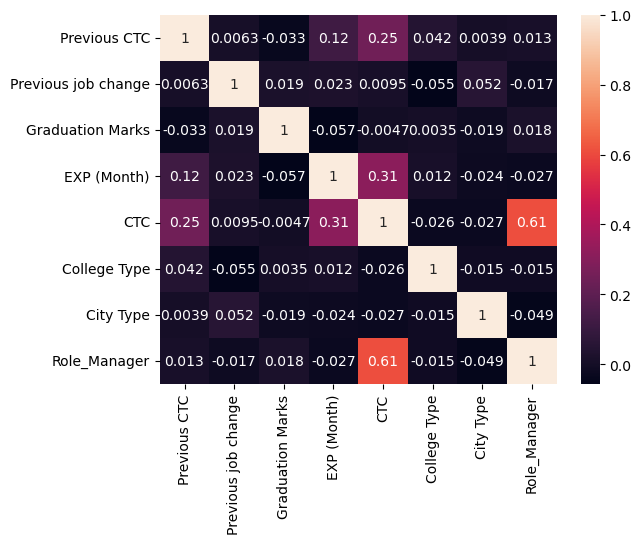

In [17]:
#checking coorelation with heatmap
sns.heatmap(new_df.corr(),annot=True)

In [18]:
#defining independent and dependent columns
X = new_df.drop('CTC', axis=1)
y = new_df['CTC']

In [19]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
# Normalize the data using Standard Scaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

### Linear Regression

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(f"Score: {lr.score(X_train,y_train)}")

Mean Squared Error: 66013643.89960199
R2 Score: 0.5790435058024452
Score: 0.5026557995488168


### KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,knn_y_pred)}")
print(f"R2 Score: {r2_score(y_test,knn_y_pred)}")
print(f"Score: {knn.score(X_train,y_train)}")

Mean Squared Error: 70644820.06646627
R2 Score: 0.5495113732302844
Score: 0.639348927114928


### Ridge Regression

In [23]:
from sklearn.linear_model import Ridge,Lasso
reg_lr = Ridge()
reg_lr.fit(X_train,y_train)
reg_lr_y_pred = reg_lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,reg_lr_y_pred)}")
print(f"R2 Score: {r2_score(y_test,reg_lr_y_pred)}")
print(f"Score: {reg_lr.score(X_train,y_train)}")

Mean Squared Error: 66033573.05067818
R2 Score: 0.5789164213836223
Score: 0.5026554970399795


In [24]:
lass_lr = Lasso()
lass_lr.fit(X_train,y_train)
lass_lr_y_pred = lass_lr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,lass_lr_y_pred)}")
print(f"R2 Score: {r2_score(y_test,lass_lr_y_pred)}")
print(f"Score: {lass_lr.score(X_train,y_train)}")

Mean Squared Error: 66015645.36182722
R2 Score: 0.5790307428572141
Score: 0.502655740353205


### DecisionTree

In [25]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(max_depth=5)
reg_tree.fit(X_train,y_train)
reg_tree_y_pred = reg_tree.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,reg_tree_y_pred)}")
print(f"R2 Score: {r2_score(y_test,reg_tree_y_pred)}")
print(f"Score: {reg_tree.score(X_train,y_train)}")

Mean Squared Error: 65570674.03479894
R2 Score: 0.5818682406649269
Score: 0.6297897561325183


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor(n_estimators=400)
reg_forest.fit(X_train,y_train)
reg_forest_y_pred = reg_forest.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,reg_forest_y_pred)}")
print(f"R2 Score: {r2_score(y_test,reg_forest_y_pred)}")
print(f"Score: {reg_forest.score(X_train,y_train)}")

Mean Squared Error: 57323389.08958681
R2 Score: 0.6344596134796869
Score: 0.9459465498014642


### XGBoost

In [27]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, xgb_y_pred)}")
print(f"R2 Score: {r2_score(y_test, xgb_y_pred)}")
print(f"Score: {xgb.score(X_train, y_train)}")

Mean Squared Error: 63208425.999457955
R2 Score: 0.5969318486198909
Score: 0.9880108714778255


### HyperParameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

model = {
        'Linear Regression': (LinearRegression(),{}),
        'Ridge Regression': (Ridge(),{'alpha':[0.1,1,5,10]}),
        'Lasso Regression': (Lasso(),{'alpha':[0.1,1,5,10]}),
        'Decision Tree': (DecisionTreeRegressor(),{'max_depth':[1,3,5,10]}),
        'Random Forest': (RandomForestRegressor(),{'n_estimators':[100,200,300,400]}),
        'XGB Regressor': (XGBRegressor(),{'learning_rate':[0.1,0.3,0.5],'n_estimators': [100, 200, 300]}),
}


In [29]:
#using for loop to get best parameter and r2_score and mean_squered_error for all models
for name,(model,params) in model.items():
    grid = GridSearchCV(model,params,cv=5,scoring='neg_mean_squared_error')
    grid.fit(X_train,y_train)
    y_grid_pred = grid.predict(X_test)
    
    print(f"Model Name: {name}")
    print(f"Best Parameter: {grid.best_params_}")
    print(f"r2_Score: {r2_score(y_test,y_grid_pred)}")
    print(f"Mean_squared_error: {mean_squared_error(y_test,y_grid_pred)}")
    print("---------------------------")

Model Name: Linear Regression
Best Parameter: {}
r2_Score: 0.5790435058024452
Mean_squared_error: 66013643.89960199
---------------------------
Model Name: Ridge Regression
Best Parameter: {'alpha': 0.1}
r2_Score: 0.5790308114530727
Mean_squared_error: 66015634.60474746
---------------------------
Model Name: Lasso Regression
Best Parameter: {'alpha': 10}
r2_Score: 0.578911495271679
Mean_squared_error: 66034345.55473529
---------------------------
Model Name: Decision Tree
Best Parameter: {'max_depth': 3}
r2_Score: 0.5848863588988698
Mean_squared_error: 65097378.13584341
---------------------------
Model Name: Random Forest
Best Parameter: {'n_estimators': 100}
r2_Score: 0.6256470408177579
Mean_squared_error: 58705360.95975099
---------------------------
Model Name: XGB Regressor
Best Parameter: {'learning_rate': 0.1, 'n_estimators': 100}
r2_Score: 0.6177178367519429
Mean_squared_error: 59948804.54791982
---------------------------


In [30]:
#Choose the model after analysing which has best perfomance and less mean_squered_error
best_model = RandomForestRegressor(n_estimators=400)
best_model.fit(X_train,y_train)
best_model_y_pred = best_model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test,best_model_y_pred)}")
print(f"R2 Score: {r2_score(y_test,best_model_y_pred)}")
print(f"Score: {reg_forest.score(X_train,y_train)}")

Mean Squared Error: 57975670.2323093
R2 Score: 0.6303001402730686
Score: 0.9459465498014642


In [31]:
#predict
predict_data = np.array([[300000, 0, 1, 35, 10, 0, 1]])
data_scaled = scale.fit_transform(predict_data)

In [32]:
#predication
best_model.predict(data_scaled)

array([72883.777875])

# Answers

**Q.1. My Views about the Problem Statement**

Problem Statement is a real world problem where Salary prediction is dependent on many other variables like College,Cities,Previous CTC and others.So creating a Automated Machine learning model will definatly help TechWorks company to define the CTC of Employees.This is Regression problem we can use Regression algorithms to solve this issue or create a ML Model.

**Q.2. My Approch to Solve this task**

To solve this task I have followed following steps:

1. Loaded all neccessory libraries.
2. We got some Categorical variable which can not pass in ML algorithmns. So handeled Categorical variable and replace with numeric values.
3. Check Data and check outliers, missing values etc.
4. plot all the columns to find out outliers.
5. After Finding out outliers Capped the outlier with lower bound and higher bound so that I can get train data without loosing data.
6. Feature Selection: to get best feature for our model checked the correlation of variables. 
7. Split the data in train and test to get better model performance.
8. Model: Tried all regression models LinearRegression,Ridge and Lasso,DecisionTreeRegressor,RandomForestRegressor,KNN,XGBoost.And got r2_score and mean_squered_error.
9. Applied Hyperparameter tuning using GridSearchCV to get parameters for best model.
10. Choose Random Forest Regressor Model Because it has lowest mean_squered_error and best r2_score and model score amoung all models.
11. used final model to predict Salary of Employee.

**Q.3. Model Option which I applied to solve this task.**
1. Linear Regression
2. Ridge Regressor
3. Lasso Regressor
4. KNN
5. Decision Tree Regressor
6. Random Forest Regressor
7. XGBoost

**Q.4. Which model's performance is best and what could be the possible reason for that?**

 After applying all models **Random Forest Regressor** showed the best performance.
 
 Possible Reasons:
 1. It can handle both linear and non-linear data.
 2. It is less prone to overfitting because it is ensemble model where multiple tree are averaged to make the predication.
 3. It can handle missing data and outliers better then other models.

**Q.5. What steps can you take to improve this selected model's performance even further?**
1. Hyperparameter Tuning: We can tune the model with more parameters and compare to get better result.
2. Feature Engineering: We can create new features or remove some features to get better model.
3. Data Might have imbalanced data if we could get more accurate data we can get better result with model.
4. we can collect more data with additional features which could help our model.